In [110]:
# !pip install yfinance
# !pip install TA-Lib 
# !pip install numpy
# !pip install pandas
# !pip install vectorbt
# !pip install scipy

In [111]:
import yfinance as yf
import talib
import numpy as np
import pandas as pd
import vectorbt as vbt
import warnings
from scipy import stats
import matplotlib.pyplot as plt


In [112]:
# DOWNLOAD STOCK DATA FROM 2018 USING YFINANCE

# Configuration - Change these variables as needed
TICKER = 'SPY'  # Any ticker symbol (e.g., 'AAPL', 'MSFT', 'GOOGL')
START_DATE = '2018-01-01'  # Any start date in YYYY-MM-DD format

# Download data from start date onwards
stock_data = yf.download(TICKER, start=START_DATE, interval='1d')

if not stock_data.empty:
    print(f"Successfully downloaded {len(stock_data)} records for {TICKER} from {START_DATE}")
    print(f"Data range: {stock_data.index.min().date()} to {stock_data.index.max().date()}")
    print("\nFirst 5 rows:")
    print(stock_data.head())
else:
    print(f"Failed to download {TICKER} data from yfinance")

# Display the downloaded data
stock_data


C:\Users\harka\AppData\Local\Temp\ipykernel_10752\2856719028.py:8: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed

Successfully downloaded 2000 records for SPY from 2018-01-01
Data range: 2018-01-02 to 2025-12-15

First 5 rows:
Price            Close        High         Low        Open    Volume
Ticker             SPY         SPY         SPY         SPY       SPY
Date                                                                
2018-01-02  237.909164  237.944579  236.696475  237.085956  86655700
2018-01-03  239.413895  239.564387  238.077268  238.077268  90070400
2018-01-04  240.423050  240.909914  239.475931  240.060151  80636400
2018-01-05  242.025208  242.149118  240.723996  241.219693  83524000
2018-01-08  242.467819  242.627145  241.635750  241.927847  57319200


Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2018-01-02,237.909164,237.944579,236.696475,237.085956,86655700
2018-01-03,239.413895,239.564387,238.077268,238.077268,90070400
2018-01-04,240.423050,240.909914,239.475931,240.060151,80636400
2018-01-05,242.025208,242.149118,240.723996,241.219693,83524000
2018-01-08,242.467819,242.627145,241.635750,241.927847,57319200
...,...,...,...,...,...
2025-12-09,683.039978,685.390015,682.590027,683.150024,58310100
2025-12-10,687.570007,688.969971,681.309998,682.559998,85671300


In [113]:
# TECHNICAL ANALYSIS INDICATORS USING TA-LIB

# Make sure stock_data is available from the previous cell
if "stock_data" not in locals():
    raise ValueError("Please run the stock data download cell first")

# Extract OHLCV data (handling multi-level columns from yfinance)
if isinstance(stock_data.columns, pd.MultiIndex):
    close = stock_data[("Close", TICKER)].values
    high = stock_data[("High", TICKER)].values
    low = stock_data[("Low", TICKER)].values
    open_ = stock_data[("Open", TICKER)].values
    volume = stock_data[("Volume", TICKER)].values
else:
    close = stock_data["Close"].values
    high = stock_data["High"].values
    low = stock_data["Low"].values
    open_ = stock_data["Open"].values
    volume = stock_data["Volume"].values

print(f"Calculating technical indicators for {TICKER}...")

# Simple Moving Averages
sma_20 = talib.SMA(close, timeperiod=20)
sma_50 = talib.SMA(close, timeperiod=50)

# Exponential Moving Averages
ema_12 = talib.EMA(close, timeperiod=12)
ema_26 = talib.EMA(close, timeperiod=26)

# MACD
macd, macdsignal, macdhist = talib.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)

# RSI
rsi = talib.RSI(close, timeperiod=14)

# Stochastic RSI
stochrsi_k, stochrsi_d = talib.STOCHRSI(close, timeperiod=14, fastk_period=3, fastd_period=3, fastd_matype=0)

# VWAP (manual calculation)
typical_price = (high + low + close) / 3
price_volume = typical_price * volume
cumulative_price_volume = np.cumsum(price_volume)
cumulative_volume = np.cumsum(volume)
vwap = cumulative_price_volume / cumulative_volume

# Schaff Trend Cycle
cycle_period = 10
macd_cycle = talib.EMA(macd, timeperiod=cycle_period)
macd_smooth = talib.EMA(macd_cycle, timeperiod=cycle_period)
highest_macd = talib.MAX(macd_smooth, timeperiod=cycle_period)
lowest_macd = talib.MIN(macd_smooth, timeperiod=cycle_period)
stc_k = 100 * ((macd_smooth - lowest_macd) / (highest_macd - lowest_macd))
stc_d = talib.SMA(stc_k, timeperiod=3)

# Create indicators dataframe
indicators_df = pd.DataFrame({
    "Date": stock_data.index,
    "Close": close,
    "SMA_20": sma_20,
    "SMA_50": sma_50,
    "EMA_12": ema_12,
    "EMA_26": ema_26,
    "MACD": macd,
    "MACD_Signal": macdsignal,
    "MACD_Hist": macdhist,
    "RSI": rsi,
    "StochRSI_K": stochrsi_k,
    "StochRSI_D": stochrsi_d,
    "VWAP": vwap,
    "STC_K": stc_k,
    "STC_D": stc_d
})

print("All technical indicators calculated!")
print(f"Data shape: {indicators_df.shape}")
indicators_df.tail(5)

Calculating technical indicators for SPY...
All technical indicators calculated!
Data shape: (2000, 15)


,Date,Close,SMA_20,SMA_50,EMA_12,EMA_26,MACD,MACD_Signal,MACD_Hist,RSI,StochRSI_K,StochRSI_D,VWAP,STC_K,STC_D
1995,2025-12-09,683.039978,674.977505,673.319200,679.957482,676.434759,3.522723,2.330903,1.191820,57.198937,0.0,33.333333,376.176086,48.470971,25.896602
1996,2025-12-10,687.570007,675.206006,673.747001,681.128640,677.259592,3.869048,2.638532,1.230515,60.941989,100.0,33.333333,376.340170,100.000000,56.547815
1997,2025-12-11,689.169983,675.495505,674.161400,682.365770,678.141843,4.223926,2.955611,1.268315,62.199372,100.0,66.666667,376.505528,100.000000,82.823657
1998,2025-12-12,681.760010,675.981506,674.412201,682.272576,678.409856,3.862720,3.137033,0.725687,53.594140,0.0,66.666667,376.719766,100.000000,100.000000
1999,2025-12-15,680.729980,676.421506,674.642600,682.035253,678.581717,3.453537,3.200334,0.253203,52.506691,0.0,33.333333,376.879121,100.000000,100.000000


In [114]:
# PREPARE PRICE SERIES

warnings.filterwarnings("ignore", message="Degrees of freedom <= 0 for slice", category=RuntimeWarning)
warnings.filterwarnings("ignore", message="invalid value encountered in scalar divide", category=RuntimeWarning)

# Expect stock_data and TICKER already exist
def select_close_series(df, ticker):
    if isinstance(df.columns, pd.MultiIndex):
        if ('Close', ticker) in df.columns:
            s = df[('Close', ticker)]
        else:
            cols = [c for c in df.columns if 'Close' in str(c)]
            if not cols:
                raise KeyError("Close not found")
            s = df[cols[0]]
    else:
        s = df['Close']
    return s.astype(float).squeeze()

close = select_close_series(stock_data, TICKER)
close.name = 'price'

# Simple split
TRAIN_RATIO = 0.60 
split_idx = int(len(close) * TRAIN_RATIO)
train_close = close.iloc[:split_idx].copy()
val_close   = close.iloc[split_idx:].copy()

print(f"Data ready: train={train_close.index[0].date()} → {train_close.index[-1].date()} | val={val_close.index[0].date()} → {val_close.index[-1].date()}")

Data ready: train=2018-01-02 → 2022-10-06 | val=2022-10-07 → 2025-12-15


MACD CROSSOVER GRID SEARCH - TRAINING SET
----------------------------------------------

This section performs a comprehensive grid search optimization for the **MACD Crossover Strategy** using only the **training data**.

The goal is to find the optimal MACD fast/slow/signal combination that maximizes the Sharpe ratio on unseen data.

**Strategy Logic**: Buy when MACD crosses above Signal line OR Histogram crosses above zero. Sell when MACD crosses below Signal line OR Histogram crosses below zero.

---

In [115]:
# Define Parameter Ranges for MACD Crossover

# MACD periods for crossover strategy
fast_periods = list(range(8, 30, 2))      # Fast EMA period (shorter-term)
slow_periods = list(range(20, 50, 2))     # Slow EMA period (longer-term)
signal_periods = list(range(6, 18, 1))    # Signal line EMA period

print("Fast Periods (fast EMA - shorter-term):")
for i, period in enumerate(fast_periods, 1):
    print(f"  {i}. {period} periods")

print("Slow Periods (slow EMA - longer-term):")
for i, period in enumerate(slow_periods, 1):
    print(f"  {i}. {period} periods")

print("Signal Periods (signal line EMA):")
for i, period in enumerate(signal_periods, 1):
    print(f"  {i}. {period} periods")

# Generate all valid combinations (fast < slow)
macd_combinations = []
for fast in fast_periods:
    for slow in slow_periods:
        for signal in signal_periods:
            if fast < slow:
                macd_combinations.append((fast, slow, signal))

print(f"Generated {len(macd_combinations)} valid MACD combinations")
print("\n📋 First 10 combinations preview:")
for i, (fast, slow, signal) in enumerate(macd_combinations[:10], 1):
    print(f"  {i:2d}. Fast: {fast:2d} | Slow: {slow:2d} | Signal: {signal:2d}")
if len(macd_combinations) > 10:
    print(f"   ... and {len(macd_combinations) - 10} more combinations")

print("\nReady to test all combinations on training data!")

Fast Periods (fast EMA - shorter-term):
  1. 8 periods
  2. 10 periods
  3. 12 periods
  4. 14 periods
  5. 16 periods
  6. 18 periods
  7. 20 periods
  8. 22 periods
  9. 24 periods
  10. 26 periods
  11. 28 periods
Slow Periods (slow EMA - longer-term):
  1. 20 periods
  2. 22 periods
  3. 24 periods
  4. 26 periods
  5. 28 periods
  6. 30 periods
  7. 32 periods
  8. 34 periods
  9. 36 periods
  10. 38 periods
  11. 40 periods
  12. 42 periods
  13. 44 periods
  14. 46 periods
  15. 48 periods
Signal Periods (signal line EMA):
  1. 6 periods
  2. 7 periods
  3. 8 periods
  4. 9 periods
  5. 10 periods
  6. 11 periods
  7. 12 periods
  8. 13 periods
  9. 14 periods
  10. 15 periods
  11. 16 periods
  12. 17 periods
Generated 1800 valid MACD combinations

📋 First 10 combinations preview:
   1. Fast:  8 | Slow: 20 | Signal:  6
   2. Fast:  8 | Slow: 20 | Signal:  7
   3. Fast:  8 | Slow: 20 | Signal:  8
   4. Fast:  8 | Slow: 20 | Signal:  9
   5. Fast:  8 | Slow: 20 | Signal: 10
   6.

In [116]:
# Initialize MACD Results Collection System

# Create empty list to store all backtest results
grid_search_results = []

print("MACD Results Collection System Initialized")
print(f"   - Will test {len(macd_combinations)} MACD combinations")
print("   - Results will be stored in 'grid_search_results' list")

# Define what metrics we will collect (All TradingView-style metrics)
metrics_to_collect = [
    # Strategy Parameters
    "fast_period",
    "slow_period", 
    "signal_period",
    
    # Return Metrics
    "total_return",
    "annualized_return",
    "total_profit",
    
    # Risk-Adjusted Return Metrics
    "sharpe_ratio",
    "sortino_ratio",
    "calmar_ratio",
    "omega_ratio",
    "information_ratio",
    "tail_ratio",
    "deflated_sharpe_ratio",
    
    # Risk Metrics
    "max_drawdown",
    "volatility",
    "ulcer_index",
    
    # Trade Performance Metrics
    "win_rate",
    "total_trades",
    "avg_trade_duration",
    "expectancy",
    "profit_factor", 
    "sqn",
    
    # Win/Loss Analysis
    "payoff_ratio",
    "largest_win",
    "largest_loss",
    "avg_win_amount",
    "avg_loss_amount",
    "winning_streak",
    "losing_streak",
    
    # Additional Ratios
    "recovery_factor",
    "gain_to_pain_ratio",
    "serenity_index"
]

print("Metrics to collect for each MACD combination:")
for i, metric in enumerate(metrics_to_collect, 1):
    print(f"  {i}. {metric.replace('_', ' ').title()}")

print("Ready to start the MACD grid search!")


MACD Results Collection System Initialized
   - Will test 1800 MACD combinations
   - Results will be stored in 'grid_search_results' list
Metrics to collect for each MACD combination:
  1. Fast Period
  2. Slow Period
  3. Signal Period
  4. Total Return
  5. Annualized Return
  6. Total Profit
  7. Sharpe Ratio
  8. Sortino Ratio
  9. Calmar Ratio
  10. Omega Ratio
  11. Information Ratio
  12. Tail Ratio
  13. Deflated Sharpe Ratio
  14. Max Drawdown
  15. Volatility
  16. Ulcer Index
  17. Win Rate
  18. Total Trades
  19. Avg Trade Duration
  20. Expectancy
  21. Profit Factor
  22. Sqn
  23. Payoff Ratio
  24. Largest Win
  25. Largest Loss
  26. Avg Win Amount
  27. Avg Loss Amount
  28. Winning Streak
  29. Losing Streak
  30. Recovery Factor
  31. Gain To Pain Ratio
  32. Serenity Index
Ready to start the MACD grid search!


In [117]:
# VISUALIZE SIGNALS FOR ONE EXAMPLE

example_fast, example_slow, example_signal = 12, 26, 9

# Calculate MACD for example
macd_example, signal_example, hist_example = talib.MACD(
    train_close.values, 
    fastperiod=example_fast, 
    slowperiod=example_slow, 
    signalperiod=example_signal
)

macd_series = pd.Series(macd_example, index=train_close.index)
signal_series = pd.Series(signal_example, index=train_close.index)
hist_series = pd.Series(hist_example, index=train_close.index)

# MACD crossover signals
entries_1 = macd_series.vbt.crossed_above(signal_series).reindex(train_close.index).fillna(False)
entries_2 = hist_series.vbt.crossed_above(0).reindex(train_close.index).fillna(False)
entries = entries_1 | entries_2

exits_1 = macd_series.vbt.crossed_below(signal_series).reindex(train_close.index).fillna(False)
exits_2 = hist_series.vbt.crossed_below(0).reindex(train_close.index).fillna(False)
exits = exits_1 | exits_2

signals_df = pd.DataFrame({
    'Close': train_close.values,
    'MACD': macd_series.values,
    'Signal': signal_series.values,
    'Histogram': hist_series.values,
    'Buy': entries.values.astype(bool),
    'Sell': exits.values.astype(bool)
}, index=train_close.index)
signals_df.index.name = 'Date'

pos = 0
pos_list = []
for buy, sell in zip(signals_df['Buy'], signals_df['Sell']):
    if buy: pos = 1
    elif sell: pos = 0
    pos_list.append(pos)
signals_df['Position'] = pos_list

print(f"Example MACD({example_fast},{example_slow},{example_signal}) signals:")
print(signals_df.head(500).to_string())


Example MACD(12,26,9) signals:
                 Close      MACD    Signal  Histogram    Buy   Sell  Position
Date                                                                         
2018-01-02  237.909164       NaN       NaN        NaN  False  False         0
2018-01-03  239.413895       NaN       NaN        NaN  False  False         0
2018-01-04  240.423050       NaN       NaN        NaN  False  False         0
2018-01-05  242.025208       NaN       NaN        NaN  False  False         0
2018-01-08  242.467819       NaN       NaN        NaN  False  False         0
2018-01-09  243.016632       NaN       NaN        NaN  False  False         0
2018-01-10  242.644867       NaN       NaN        NaN  False  False         0
2018-01-11  244.415161       NaN       NaN        NaN  False  False         0
2018-01-12  246.008545       NaN       NaN        NaN  False  False         0
2018-01-16  245.167618       NaN       NaN        NaN  False  False         0
2018-01-17  247.504501       NaN 

In [118]:
# MACD CROSSOVER GRID SEARCH ON TRAINING DATA - VECTORIZED & BATCHED

print("INITIATING VECTORIZED MACD CROSSOVER GRID SEARCH OPTIMIZATION")
print("=" * 70)
print(f"Testing Strategy: MACD Crossover")
print(f"Training Period: {train_close.index[0].date()} → {train_close.index[-1].date()}")
print(f"Initial Capital: $100,000")
print(f"Transaction Costs: 0.05% per trade (fees + slippage)")
print(f"Optimization Metric: Sharpe Ratio (risk-adjusted returns)")
print("=" * 70)

# Configuration
BATCH_SIZE = 1000  # Process combinations in batches to manage memory
total_combinations = len(macd_combinations)

print(f"Total combinations to test: {total_combinations}")
print(f"Batch size: {BATCH_SIZE}")
print(f"Using vectorized computation for maximum speed\n")

# Process in batches
grid_search_results = []
successful_tests = 0
failed_tests = 0

print("Starting batched grid search...\n")

for batch_start in range(0, total_combinations, BATCH_SIZE):
    batch_end = min(batch_start + BATCH_SIZE, total_combinations)
    batch_combos = macd_combinations[batch_start:batch_end]
    batch_size = len(batch_combos)
    
    print(f"Processing batch {batch_start//BATCH_SIZE + 1}/{(total_combinations + BATCH_SIZE - 1)//BATCH_SIZE}")
    print(f"  Combinations {batch_start+1} to {batch_end}...")
    
    # Build signal matrices for this batch
    batch_entries = []
    batch_exits = []
    
    for fast_period, slow_period, signal_period in batch_combos:
        try:
            # Calculate MACD for this combination
            macd, signal, hist = talib.MACD(
                train_close.values,
                fastperiod=fast_period,
                slowperiod=slow_period,
                signalperiod=signal_period
            )
            
            macd_series = pd.Series(macd, index=train_close.index)
            signal_series = pd.Series(signal, index=train_close.index)
            hist_series = pd.Series(hist, index=train_close.index)
            
            # MACD crossover signals
            entries_raw = (
                macd_series.vbt.crossed_above(signal_series) |
                hist_series.vbt.crossed_above(0)
            )
            exits_raw = (
                macd_series.vbt.crossed_below(signal_series) |
                hist_series.vbt.crossed_below(0)
            )
            
            # Fix lookahead bias: shift signals by 1 bar (clean, no warnings)
            entries_shifted = entries_raw.shift(1)
            entries = pd.Series(np.where(entries_shifted.isna(), False, entries_shifted), index=train_close.index, dtype=bool)
            
            exits_shifted = exits_raw.shift(1)
            exits = pd.Series(np.where(exits_shifted.isna(), False, exits_shifted), index=train_close.index, dtype=bool)
            
            batch_entries.append(entries)
            batch_exits.append(exits)
            
        except Exception as e:
            # Add empty signals for failed combinations
            batch_entries.append(pd.Series(False, index=train_close.index, dtype=bool))
            batch_exits.append(pd.Series(False, index=train_close.index, dtype=bool))
            failed_tests += 1
    
    # Convert to DataFrame for vectorized backtesting
    entries_df = pd.DataFrame(batch_entries).T
    exits_df = pd.DataFrame(batch_exits).T
    
    # Vectorized backtest for entire batch at once
    print(f"  Running vectorized backtest on {batch_size} combinations...")
    try:
        portfolios = vbt.Portfolio.from_signals(
            close=train_close,
            entries=entries_df,
            exits=exits_df,
            init_cash=100_000,
            fees=0.0005,
            slippage=0.0005,
            freq='D'
        )
        
        # Extract metrics for all combinations in batch
        total_returns = portfolios.total_return()
        annualized_returns = portfolios.annualized_return(freq='D')
        max_drawdowns = portfolios.max_drawdown()
        volatilities = portfolios.annualized_volatility(freq='D')
        sharpe_ratios = portfolios.sharpe_ratio(freq='D')
        sortino_ratios = portfolios.sortino_ratio(freq='D')
        
        # Process each result in the batch
        for idx, (fast_period, slow_period, signal_period) in enumerate(batch_combos):
            try:
                # Get scalar values for this combination
                total_return = float(total_returns.iloc[idx] if hasattr(total_returns, 'iloc') else total_returns)
                annualized_return = float(annualized_returns.iloc[idx] if hasattr(annualized_returns, 'iloc') else annualized_returns)
                max_drawdown = float(max_drawdowns.iloc[idx] if hasattr(max_drawdowns, 'iloc') else max_drawdowns)
                volatility = float(volatilities.iloc[idx] if hasattr(volatilities, 'iloc') else volatilities)
                sharpe_ratio = float(sharpe_ratios.iloc[idx] if hasattr(sharpe_ratios, 'iloc') else sharpe_ratios)
                sortino_ratio = float(sortino_ratios.iloc[idx] if hasattr(sortino_ratios, 'iloc') else sortino_ratios)
                
                # Get trade-level metrics
                trades = portfolios.trades if batch_size == 1 else portfolios[idx].trades
                total_trades = len(trades)
                
                # Trades per year filter
                years = max((train_close.index[-1] - train_close.index[0]).days / 365.25, 1e-9)
                trades_per_year = total_trades / years
                
                if trades_per_year < 2:
                    continue
                
                # Trade statistics
                win_rate_pct = np.nan
                profit_factor = np.nan
                expectancy = 0.0
                avg_win_amount = 0.0
                avg_loss_amount = 0.0
                winning_streak = np.nan
                losing_streak = np.nan
                
                if total_trades > 0:
                    tr = trades.returns.values if hasattr(trades.returns, 'values') else np.array(trades.returns)
                    if tr.size > 0:
                        pos = tr[tr > 0]
                        neg = tr[tr < 0]
                        win_rate_pct = (len(pos) / len(tr)) * 100.0 if len(tr) > 0 else np.nan
                        gains = pos.sum() if len(pos) else 0.0
                        losses = abs(neg.sum()) if len(neg) else 0.0
                        profit_factor = gains / losses if losses > 0 else np.inf
                        expectancy = float(tr.mean())
                        avg_win_amount = float(pos.mean()) if len(pos) else 0.0
                        avg_loss_amount = float(abs(neg.mean())) if len(neg) else 0.0
                        
                        try:
                            winning_streak = int(trades.winning_streak[idx] if batch_size > 1 else trades.winning_streak())
                            losing_streak = int(trades.losing_streak[idx] if batch_size > 1 else trades.losing_streak())
                        except:
                            pass
                
                # Ulcer Index
                returns = portfolios.returns().iloc[:, idx] if batch_size > 1 else portfolios.returns()
                cum = (1 + returns).cumprod()
                peak = cum.cummax()
                dd = (cum - peak) / peak
                ulcer_index = float(np.sqrt((dd.pow(2)).mean())) if len(dd) > 0 else np.nan
                
                payoff_ratio = (avg_win_amount / avg_loss_amount) if avg_loss_amount not in (0.0, np.nan) else np.inf
                
                # Store results
                grid_search_results.append({
                    "fast_period": fast_period,
                    "slow_period": slow_period,
                    "signal_period": signal_period,
                    "total_return": total_return,
                    "annualized_return": annualized_return,
                    "max_drawdown": max_drawdown,
                    "volatility": volatility,
                    "sharpe_ratio": sharpe_ratio,
                    "sortino_ratio": sortino_ratio,
                    "information_ratio": np.nan,
                    "tail_ratio": np.nan,
                    "deflated_sharpe_ratio": np.nan,
                    "ulcer_index": ulcer_index,
                    "total_trades": total_trades,
                    "win_rate": win_rate_pct,
                    "profit_factor": profit_factor,
                    "expectancy": expectancy,
                    "avg_win_amount": avg_win_amount,
                    "avg_loss_amount": avg_loss_amount,
                    "payoff_ratio": payoff_ratio,
                    "winning_streak": winning_streak,
                    "losing_streak": losing_streak,
                    "trades_per_year": trades_per_year
                })
                successful_tests += 1
                
            except Exception as e:
                failed_tests += 1
                
    except Exception as e:
        print(f"  ⚠️ Batch failed: {str(e)[:100]}")
        failed_tests += batch_size
    
    # Progress update
    progress_pct = (batch_end / total_combinations) * 100
    print(f"  ✓ Batch complete: {successful_tests} successful, {failed_tests} failed")
    print(f"  Overall progress: {batch_end}/{total_combinations} ({progress_pct:.1f}%)\n")

# SUMMARY
print("=" * 70)
print("VECTORIZED GRID SEARCH COMPLETED!")
print("=" * 70)
print(f"Total combinations attempted: {total_combinations}")
print(f"Successfully completed: {successful_tests}")
print(f"Failed: {failed_tests}")
print(f"Success rate: {(successful_tests/total_combinations)*100:.1f}%")
print(f"\n✓ Results stored in 'grid_search_results' ({len(grid_search_results)} entries)")

if successful_tests > 0:
    results_df_preview = pd.DataFrame(grid_search_results)
    
    # Display top 5 combinations
    print("\n" + "=" * 70)
    print("🏆 TOP 5 COMBINATIONS (by In-Sample Sharpe Ratio)")
    print("=" * 70)
    
    top_5 = results_df_preview.nlargest(5, 'sharpe_ratio')
    for rank, (idx, row) in enumerate(top_5.iterrows(), 1):
        print(f"\n#{rank} - MACD({int(row['fast_period'])}, {int(row['slow_period'])}, {int(row['signal_period'])})")
        print(f"   Sharpe Ratio:      {row['sharpe_ratio']:.3f}")
        print(f"   Total Return:      {row['total_return']:.2%}")
        print(f"   Annualized Return: {row['annualized_return']:.2%}")
        print(f"   Max Drawdown:      {row['max_drawdown']:.2%}")
        print(f"   Win Rate:          {row['win_rate']:.1f}%")
        print(f"   Profit Factor:     {row['profit_factor']:.2f}")
        print(f"   Total Trades:      {int(row['total_trades'])} ({row['trades_per_year']:.1f}/year)")
    
    print("\n" + "=" * 70)

INITIATING VECTORIZED MACD CROSSOVER GRID SEARCH OPTIMIZATION
Testing Strategy: MACD Crossover
Training Period: 2018-01-02 → 2022-10-06
Initial Capital: $100,000
Transaction Costs: 0.05% per trade (fees + slippage)
Optimization Metric: Sharpe Ratio (risk-adjusted returns)
Total combinations to test: 1800
Batch size: 1000
Using vectorized computation for maximum speed

Starting batched grid search...

Processing batch 1/2
  Combinations 1 to 1000...


  Running vectorized backtest on 1000 combinations...
  ✓ Batch complete: 1000 successful, 0 failed
  Overall progress: 1000/1800 (55.6%)

Processing batch 2/2
  Combinations 1001 to 1800...
  Running vectorized backtest on 800 combinations...
  ✓ Batch complete: 1800 successful, 0 failed
  Overall progress: 1800/1800 (100.0%)

VECTORIZED GRID SEARCH COMPLETED!
Total combinations attempted: 1800
Successfully completed: 1800
Failed: 0
Success rate: 100.0%

✓ Results stored in 'grid_search_results' (1800 entries)

🏆 TOP 5 COMBINATIONS (by In-Sample Sharpe Ratio)

#1 - MACD(10, 46, 15)
   Sharpe Ratio:      0.905
   Total Return:      43.65%
   Annualized Return: 11.65%
   Max Drawdown:      -15.54%
   Win Rate:          56.4%
   Profit Factor:     1.98
   Total Trades:      39 (8.2/year)

#2 - MACD(12, 34, 16)
   Sharpe Ratio:      0.874
   Total Return:      41.32%
   Annualized Return: 11.09%
   Max Drawdown:      -15.78%
   Win Rate:          52.6%
   Profit Factor:     1.95
   Total 

In [119]:
# Analyze MACD Grid Search Results

# Convert results to DataFrame for analysis
results_df = pd.DataFrame(grid_search_results)

print("Grid Search Results Analysis")
print("=" * 50)
print(f"Total combinations tested: {len(results_df)}")
print(f"Results shape: {results_df.shape}")

# Comprehensive TradingView-style statistics
print("Comprehensive Performance Statistics:")
print("-" * 50)

# Return Metrics
print("Return Metrics:")
print(f"   Best Total Return: {results_df['total_return'].max():.2%}")
print(f"   Average Total Return: {results_df['total_return'].mean():.2%}")
print(f"   Best Annualized Return: {results_df['annualized_return'].max():.2%}")

# Risk-Adjusted Metrics
print("Risk-Adjusted Return Metrics:")
print(f"   Best Sharpe Ratio: {results_df['sharpe_ratio'].max():.3f}")
print(f"   Best Sortino Ratio: {results_df['sortino_ratio'].max():.3f}")

# Risk Metrics
print("Risk Metrics:")
print(f"   Average Max Drawdown: {results_df['max_drawdown'].mean():.2%}")
print(f"   Best Max Drawdown: {results_df['max_drawdown'].min():.2%}")
print(f"   Average Volatility: {results_df['volatility'].mean():.2%}")

# Trade Performance
print("Trade Performance:")
print(f"   Best Win Rate: {results_df['win_rate'].max():.1f}%")  # Changed from :.1%
print(f"   Average Win Rate: {results_df['win_rate'].mean():.1f}%")  # Changed from :.1%
print(f"   Best Profit Factor: {results_df['profit_factor'].max():.2f}")
print(f"   Total Trades Range: {results_df['total_trades'].min():.0f} - {results_df['total_trades'].max():.0f}")

# Additional Available Metrics
print("Additional Metrics:")
print(f"   Best Expectancy: {results_df['expectancy'].max():.4f}")
print(f"   Average Trades per Year: {results_df['trades_per_year'].mean():.1f}")

# Find best combination by Sharpe ratio
best_result = results_df.loc[results_df['sharpe_ratio'].idxmax()]

print("BEST STRATEGY (by Sharpe Ratio)")
print("-" * 50)
print(f"Fast Period: {int(best_result['fast_period'])}")
print(f"Slow Period: {int(best_result['slow_period'])}")
print(f"Signal Period: {int(best_result['signal_period'])}")
print(f"Total Return: {best_result['total_return']:.2%}")
print(f"Sharpe Ratio: {best_result['sharpe_ratio']:.3f}")
print(f"Max Drawdown: {best_result['max_drawdown']:.2%}")
print(f"Win Rate: {best_result['win_rate']:.1f}%")  # Changed from :.1%
print(f"Total Trades: {int(best_result['total_trades'])}")

print("Top 5 Best Performers:")
top_5 = results_df.nlargest(5, "sharpe_ratio")
for i, (_, row) in enumerate(top_5.iterrows(), 1):
    print(f"{i}. MACD({int(row['fast_period'])},{int(row['slow_period'])},{int(row['signal_period'])}) → Sharpe: {row['sharpe_ratio']:.3f}, Return: {row['total_return']:.1%}")

print("nAnalysis complete! Best strategy identified.")

Grid Search Results Analysis
Total combinations tested: 1800
Results shape: (1800, 23)
Comprehensive Performance Statistics:
--------------------------------------------------
Return Metrics:
   Best Total Return: 43.65%
   Average Total Return: 21.18%
   Best Annualized Return: 11.65%
Risk-Adjusted Return Metrics:
   Best Sharpe Ratio: 0.905
   Best Sortino Ratio: 1.303
Risk Metrics:
   Average Max Drawdown: -19.17%
   Best Max Drawdown: -26.36%
   Average Volatility: 13.33%
Trade Performance:
   Best Win Rate: 57.6%
   Average Win Rate: 48.2%
   Best Profit Factor: 1.98
   Total Trades Range: 24 - 70
Additional Metrics:
   Best Expectancy: 0.0107
   Average Trades per Year: 8.8
BEST STRATEGY (by Sharpe Ratio)
--------------------------------------------------
Fast Period: 10
Slow Period: 46
Signal Period: 15
Total Return: 43.65%
Sharpe Ratio: 0.905
Max Drawdown: -15.54%
Win Rate: 56.4%
Total Trades: 39
Top 5 Best Performers:
1. MACD(10,46,15) → Sharpe: 0.905, Return: 43.7%
2. MACD(12

In [120]:
# TOP 5 OUT-OF-SAMPLE VALIDATION & COMPARISON TABLE

if 'FREQ' not in globals():
    FREQ = "1D"

if results_df.empty:
    print("No results to validate.")
else:
    print("=" * 90)
    print("🏆 TOP 5 STRATEGIES - OUT-OF-SAMPLE VALIDATION")
    print("=" * 90)
    print(f"Training Period: {train_close.index[0].date()} → {train_close.index[-1].date()}")
    print(f"Validation Period: {val_close.index[0].date()} → {val_close.index[-1].date()}")
    print("=" * 90)
    
    # Get top 5 by in-sample Sharpe
    top_5_strategies = results_df.nlargest(5, 'sharpe_ratio')
    
    # Results storage
    oos_results = []
    
    for idx, strategy in top_5_strategies.iterrows():
        fast = int(strategy['fast_period'])
        slow = int(strategy['slow_period'])
        signal = int(strategy['signal_period'])
        
        # Calculate MACD on validation data
        macd_val, signal_val, hist_val = talib.MACD(
            val_close.values,
            fastperiod=fast,
            slowperiod=slow,
            signalperiod=signal
        )
        
        macd_series = pd.Series(macd_val, index=val_close.index)
        signal_series = pd.Series(signal_val, index=val_close.index)
        hist_series = pd.Series(hist_val, index=val_close.index)
        
        # MACD crossover signals
        entries_raw = (
            macd_series.vbt.crossed_above(signal_series) |
            hist_series.vbt.crossed_above(0)
        )
        exits_raw = (
            macd_series.vbt.crossed_below(signal_series) |
            hist_series.vbt.crossed_below(0)
        )
        
        # Fix lookahead bias: shift signals by 1 bar
        entries_shifted = entries_raw.shift(1)
        entries = pd.Series(np.where(entries_shifted.isna(), False, entries_shifted), index=val_close.index, dtype=bool)
        
        exits_shifted = exits_raw.shift(1)
        exits = pd.Series(np.where(exits_shifted.isna(), False, exits_shifted), index=val_close.index, dtype=bool)
        
        # Run OOS backtest
        pf_val = vbt.Portfolio.from_signals(
            close=val_close,
            entries=entries,
            exits=exits,
            init_cash=100_000,
            fees=0.0005,
            slippage=0.0005,
            freq=FREQ
        )
        
        # OOS metrics
        oos_total_return = float(pf_val.total_return())
        oos_annualized_return = float(pf_val.annualized_return(freq=FREQ))
        oos_sharpe = float(pf_val.sharpe_ratio(freq=FREQ))
        oos_sortino = float(pf_val.sortino_ratio(freq=FREQ))
        oos_max_drawdown = float(pf_val.max_drawdown())
        oos_volatility = float(pf_val.annualized_volatility(freq=FREQ))
        
        trades = pf_val.trades
        oos_total_trades = len(trades)
        years = max((val_close.index[-1] - val_close.index[0]).days / 365.25, 1e-9)
        oos_trades_per_year = oos_total_trades / years
        
        oos_win_rate_pct = np.nan
        oos_profit_factor = np.nan
        oos_expectancy = 0.0
        
        if oos_total_trades > 0:
            tr = trades.returns.values if hasattr(trades.returns, 'values') else np.array(trades.returns)
            if tr.size > 0:
                pos = tr[tr > 0]
                neg = tr[tr < 0]
                oos_win_rate_pct = (len(pos) / len(tr)) * 100.0 if len(tr) > 0 else np.nan
                gains = pos.sum() if len(pos) else 0.0
                losses = abs(neg.sum()) if len(neg) else 0.0
                oos_profit_factor = gains / losses if losses > 0 else np.inf
                oos_expectancy = float(tr.mean())
        
        # Store results
        oos_results.append({
            'Rank': len(oos_results) + 1,
            'Fast': fast,
            'Slow': slow,
            'Signal': signal,
            'IS_Sharpe': float(strategy['sharpe_ratio']),
            'IS_Return': float(strategy['total_return']),
            'IS_MaxDD': float(strategy['max_drawdown']),
            'IS_WinRate': float(strategy['win_rate']),
            'OOS_Sharpe': oos_sharpe,
            'OOS_Return': oos_total_return,
            'OOS_MaxDD': oos_max_drawdown,
            'OOS_WinRate': oos_win_rate_pct,
            'OOS_Trades': oos_total_trades,
            'OOS_ProfitFactor': oos_profit_factor,
            'Sharpe_Degradation': ((oos_sharpe - strategy['sharpe_ratio']) / abs(strategy['sharpe_ratio']) * 100) if strategy['sharpe_ratio'] != 0 else np.nan,
            'Return_Degradation': ((oos_total_return - strategy['total_return']) / abs(strategy['total_return']) * 100) if strategy['total_return'] != 0 else np.nan
        })
    
    # Create DataFrame
    oos_df = pd.DataFrame(oos_results)
    
    # Sort by OOS Sharpe (best to worst)
    oos_df_sorted = oos_df.sort_values('OOS_Sharpe', ascending=False).reset_index(drop=True)
    oos_df_sorted['OOS_Rank'] = range(1, len(oos_df_sorted) + 1)
    
    # Display comprehensive table
    print("\n📊 COMPREHENSIVE COMPARISON TABLE (Sorted by OOS Sharpe)")
    print("=" * 90)
    
    display_df = pd.DataFrame({
        'IS→OOS Rank': oos_df_sorted['Rank'].astype(str) + '→' + oos_df_sorted['OOS_Rank'].astype(str),
        'Strategy': oos_df_sorted.apply(lambda x: f"MACD({x['Fast']},{x['Slow']},{x['Signal']})", axis=1),
        'IS Sharpe': oos_df_sorted['IS_Sharpe'].map('{:.3f}'.format),
        'OOS Sharpe': oos_df_sorted['OOS_Sharpe'].map('{:.3f}'.format),
        'Sharpe Δ%': oos_df_sorted['Sharpe_Degradation'].map('{:+.1f}%'.format),
        'IS Return': oos_df_sorted['IS_Return'].map('{:.1%}'.format),
        'OOS Return': oos_df_sorted['OOS_Return'].map('{:.1%}'.format),
        'Return Δ%': oos_df_sorted['Return_Degradation'].map('{:+.1f}%'.format),
        'OOS Trades': oos_df_sorted['OOS_Trades'].astype(int),
        'OOS WinRate': oos_df_sorted['OOS_WinRate'].map('{:.1f}%'.format),
        'OOS PF': oos_df_sorted['OOS_ProfitFactor'].map('{:.2f}'.format)
    })
    
    print(display_df.to_string(index=False))
    
    # Highlight best OOS performer
    best_oos = oos_df_sorted.iloc[0]
    print("\n" + "=" * 90)
    print(f"✨ BEST OUT-OF-SAMPLE PERFORMER")
    print("=" * 90)
    print(f"Strategy: MACD({int(best_oos['Fast'])}, {int(best_oos['Slow'])}, {int(best_oos['Signal'])})")
    print(f"In-Sample Rank:        #{int(best_oos['Rank'])}")
    print(f"Out-of-Sample Rank:    #1")
    print(f"OOS Sharpe Ratio:      {best_oos['OOS_Sharpe']:.3f}")
    print(f"OOS Return:            {best_oos['OOS_Return']:.2%}")
    print(f"OOS Max Drawdown:      {best_oos['OOS_MaxDD']:.2%}")
    print(f"OOS Win Rate:          {best_oos['OOS_WinRate']:.1f}%")
    print(f"OOS Profit Factor:     {best_oos['OOS_ProfitFactor']:.2f}")
    print(f"OOS Total Trades:      {int(best_oos['OOS_Trades'])}")
    print(f"Sharpe Degradation:    {best_oos['Sharpe_Degradation']:+.1f}%")
    print("=" * 90)


🏆 TOP 5 STRATEGIES - OUT-OF-SAMPLE VALIDATION
Training Period: 2018-01-02 → 2022-10-06
Validation Period: 2022-10-07 → 2025-12-15

📊 COMPREHENSIVE COMPARISON TABLE (Sorted by OOS Sharpe)
IS→OOS Rank             Strategy IS Sharpe OOS Sharpe Sharpe Δ% IS Return OOS Return Return Δ%  OOS Trades OOS WinRate OOS PF
        5→1  MACD(22.0,48.0,6.0)     0.862      0.885     +2.7%     41.0%      19.4%    -52.6%          31       45.2%   1.81
        4→2  MACD(24.0,44.0,6.0)     0.868      0.885     +2.0%     41.2%      19.8%    -52.0%          31       41.9%   1.83
        1→3 MACD(10.0,46.0,15.0)     0.905      0.638    -29.5%     43.7%      14.6%    -66.5%          32       40.6%   1.55
        3→4 MACD(16.0,34.0,12.0)     0.874      0.489    -44.0%     41.3%      11.2%    -72.8%          26       50.0%   1.43
        2→5 MACD(12.0,34.0,16.0)     0.874      0.473    -45.8%     41.3%      10.8%    -73.9%          26       46.2%   1.42

✨ BEST OUT-OF-SAMPLE PERFORMER
Strategy: MACD(22, 48, 6)

In [121]:
# FULL-SAMPLE EVALUATION 

if 'FREQ' not in globals():
    FREQ = "1D"

# 1) Select full Close series from stock_data (robust to MultiIndex)
if isinstance(stock_data.columns, pd.MultiIndex):
    if ('Close', TICKER) in stock_data.columns:
        full_close = stock_data[('Close', TICKER)].astype(float).rename(TICKER)
    else:
        # fallbacks
        found = None
        for col in stock_data.columns:
            if isinstance(col, tuple) and ('Close' in col):
                found = col
                break
        if found is None:
            for col in stock_data.columns:
                if 'Close' in str(col):
                    found = col
                    break
        if found is None:
            raise KeyError("Could not find a 'Close' column for full-sample test.")
        full_close = stock_data[found].astype(float).rename(TICKER)
else:
    full_close = stock_data['Close'].astype(float).rename(TICKER)

# 2) Use best parameters from training results
if 'results_df' not in globals() or results_df.empty:
    raise ValueError("results_df is empty or missing. Run the grid search first.")
best = results_df.loc[results_df['sharpe_ratio'].idxmax()]
fast, slow, signal = int(best['fast_period']), int(best['slow_period']), int(best['signal_period'])

print(f"FULL-SAMPLE EVALUATION: MACD({fast},{slow},{signal}) on {full_close.index[0].date()} → {full_close.index[-1].date()}")

# 3) Recompute indicators on the full sample
macd_full, signal_full, hist_full = talib.MACD(
    full_close.values,
    fastperiod=fast,
    slowperiod=slow,
    signalperiod=signal
)

macd_series = pd.Series(macd_full, index=full_close.index)
signal_series = pd.Series(signal_full, index=full_close.index)
hist_series = pd.Series(hist_full, index=full_close.index)

# 4) Generate signals (convert to plain arrays to avoid ColumnsOnly errors)
e1 = macd_series.vbt.crossed_above(signal_series).reindex(full_close.index).fillna(False)
e2 = hist_series.vbt.crossed_above(0).reindex(full_close.index).fillna(False)
entries_raw = e1 | e2

x1 = macd_series.vbt.crossed_below(signal_series).reindex(full_close.index).fillna(False)
x2 = hist_series.vbt.crossed_below(0).reindex(full_close.index).fillna(False)
exits_raw = x1 | x2

# ⚠️ FIX LOOKAHEAD BIAS: Shift signals by 1 bar
entries = entries_raw.shift(1).fillna(False).to_numpy(dtype=bool)
exits = exits_raw.shift(1).fillna(False).to_numpy(dtype=bool)

# 5) Full-sample backtest
pf_full = vbt.Portfolio.from_signals(
    close=full_close.to_numpy(dtype=float),
    entries=entries,
    exits=exits,
    init_cash=100_000,
    fees=0.0005,
    slippage=0.0005,
    freq=FREQ
)

# 6) Metrics
full_total_return = pf_full.total_return()
full_annualized_return = pf_full.annualized_return(freq=FREQ)
full_sharpe = pf_full.sharpe_ratio(freq=FREQ)
full_sortino = pf_full.sortino_ratio(freq=FREQ)
full_max_dd = pf_full.max_drawdown()
full_vol = pf_full.annualized_volatility(freq=FREQ)

# Trade metrics (compute explicitly for correctness)
trades = pf_full.trades
full_total_trades = len(trades)
years = max((full_close.index[-1] - full_close.index[0]).days / 365.25, 1e-9)
full_trades_per_year = full_total_trades / years

full_win_rate_pct = np.nan
full_profit_factor = np.nan
full_expectancy = 0.0
avg_win_amount = 0.0
avg_loss_amount = 0.0

if full_total_trades > 0:
    tr = trades.returns.values if hasattr(trades.returns, 'values') else np.array(trades.returns)
    if tr.size > 0:
        pos = tr[tr > 0]
        neg = tr[tr < 0]
        full_win_rate_pct = (len(pos) / len(tr)) * 100.0
        gains = pos.sum() if len(pos) else 0.0
        losses = abs(neg.sum()) if len(neg) else 0.0
        full_profit_factor = (gains / losses) if losses > 0 else np.inf
        full_expectancy = tr.mean()
        avg_win_amount = float(pos.mean()) if len(pos) else 0.0
        avg_loss_amount = float(abs(neg.mean())) if len(neg) else 0.0

# 7) Optional benchmark
bh_total_return = (full_close.iloc[-1] / full_close.iloc[0]) - 1.0
bh_annualized = (1.0 + bh_total_return) ** (1.0 / years) - 1.0 if years > 0 else np.nan

# 8) Display

print("FULL-SAMPLE RESULTS")

print("RETURN METRICS:")
print(f"{'Total Return':<25} {full_total_return:>10.2%}")
print(f"{'Annualized Return':<25} {full_annualized_return:>10.2%}")

print("RISK-ADJUSTED:")
print(f"{'Sharpe Ratio':<25} {full_sharpe:>10.3f}")
print(f"{'Sortino Ratio':<25} {full_sortino:>10.3f}")

print("RISK:")
print(f"{'Max Drawdown':<25} {full_max_dd:>10.2%}")
print(f"{'Volatility':<25} {full_vol:>10.2%}")

print("TRADES:")
print(f"{'Total Trades':<25} {full_total_trades:>10.0f}")
print(f"{'Trades per Year':<25} {full_trades_per_year:>10.1f}")
print(f"{'Win Rate %':<25} {full_win_rate_pct if not np.isnan(full_win_rate_pct) else np.nan:>10.1f}")
print(f"{'Profit Factor':<25} {full_profit_factor:>10.2f}")
print(f"{'Expectancy':<25} {full_expectancy:>10.4f}")
print(f"{'Avg Win Amount':<25} {avg_win_amount:>10.4f}")
print(f"{'Avg Loss Amount':<25} {avg_loss_amount:>10.4f}")

print("BENCHMARK (BUY & HOLD):")
print(f"{'Total Return':<25} {bh_total_return:>10.2%}")
print(f"{'Annualized Return':<25} {bh_annualized:>10.2%}")

FULL-SAMPLE EVALUATION: MACD(10,46,15) on 2018-01-02 → 2025-12-15
FULL-SAMPLE RESULTS
RETURN METRICS:
Total Return                  76.01%
Annualized Return             10.87%
RISK-ADJUSTED:
Sharpe Ratio                   0.869
Sortino Ratio                  1.257
RISK:
Max Drawdown                 -15.54%
Volatility                    12.83%
TRADES:
Total Trades                      72
Trades per Year                  9.1
Win Rate %                      51.4
Profit Factor                   1.90
Expectancy                    0.0089
Avg Win Amount                0.0365
Avg Loss Amount               0.0203
BENCHMARK (BUY & HOLD):
Total Return                 186.13%
Annualized Return             14.14%


C:\Users\harka\AppData\Local\Temp\ipykernel_10752\2296099020.py:58: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\harka\AppData\Local\Temp\ipykernel_10752\2296099020.py:59: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [122]:
# STORE BEST OOS STRATEGY FOR VISUALIZATIONS

if 'oos_df_sorted' in locals() and not oos_df_sorted.empty:
    # Get the best OOS performer
    best_oos_strategy = oos_df_sorted.iloc[0]
    
    # Store parameters for other cells to use
    BEST_FAST = int(best_oos_strategy['Fast'])
    BEST_SLOW = int(best_oos_strategy['Slow'])
    BEST_SIGNAL = int(best_oos_strategy['Signal'])
    BEST_OOS_SHARPE = float(best_oos_strategy['OOS_Sharpe'])
    BEST_IS_SHARPE = float(best_oos_strategy['IS_Sharpe'])
    
    print(f"✅ Best OOS Strategy stored for visualizations:")
    print(f"   MACD({BEST_FAST}, {BEST_SLOW}, {BEST_SIGNAL})")
    print(f"   OOS Sharpe: {BEST_OOS_SHARPE:.3f}")
    print(f"   IS Sharpe:  {BEST_IS_SHARPE:.3f}")
else:
    # Fallback to best in-sample if OOS not available
    if not results_df.empty:
        best_is = results_df.loc[results_df['sharpe_ratio'].idxmax()]
        BEST_FAST = int(best_is['fast_period'])
        BEST_SLOW = int(best_is['slow_period'])
        BEST_SIGNAL = int(best_is['signal_period'])
        BEST_OOS_SHARPE = np.nan
        BEST_IS_SHARPE = float(best_is['sharpe_ratio'])
        print(f"⚠️ Using best in-sample strategy (OOS validation not run yet):")
        print(f"   MACD({BEST_FAST}, {BEST_SLOW}, {BEST_SIGNAL})")
        print(f"   IS Sharpe: {BEST_IS_SHARPE:.3f}")


✅ Best OOS Strategy stored for visualizations:
   MACD(22, 48, 6)
   OOS Sharpe: 0.885
   IS Sharpe:  0.862


C:\Users\harka\AppData\Local\Temp\ipykernel_10752\760879878.py:32: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\harka\AppData\Local\Temp\ipykernel_10752\760879878.py:33: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



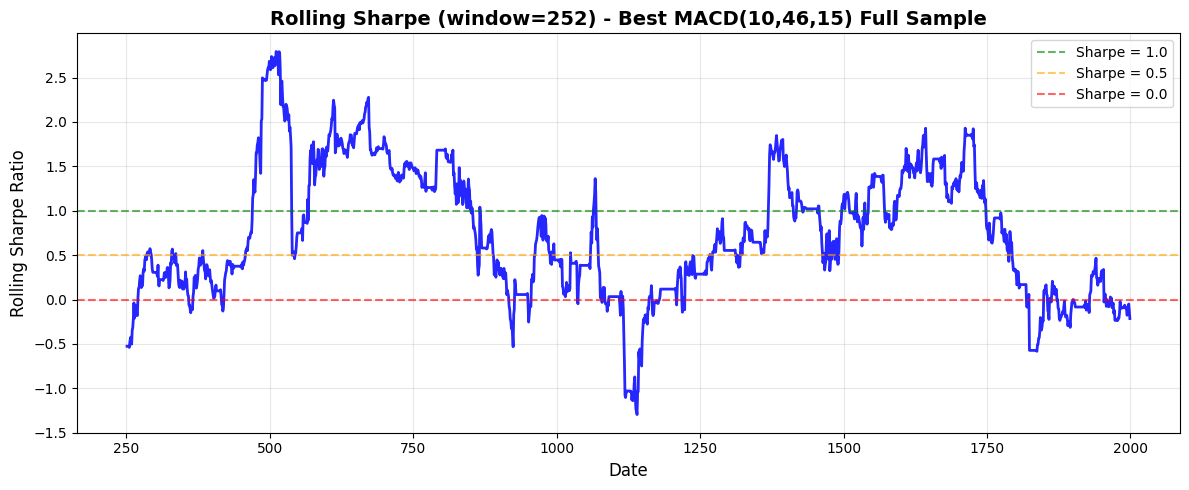

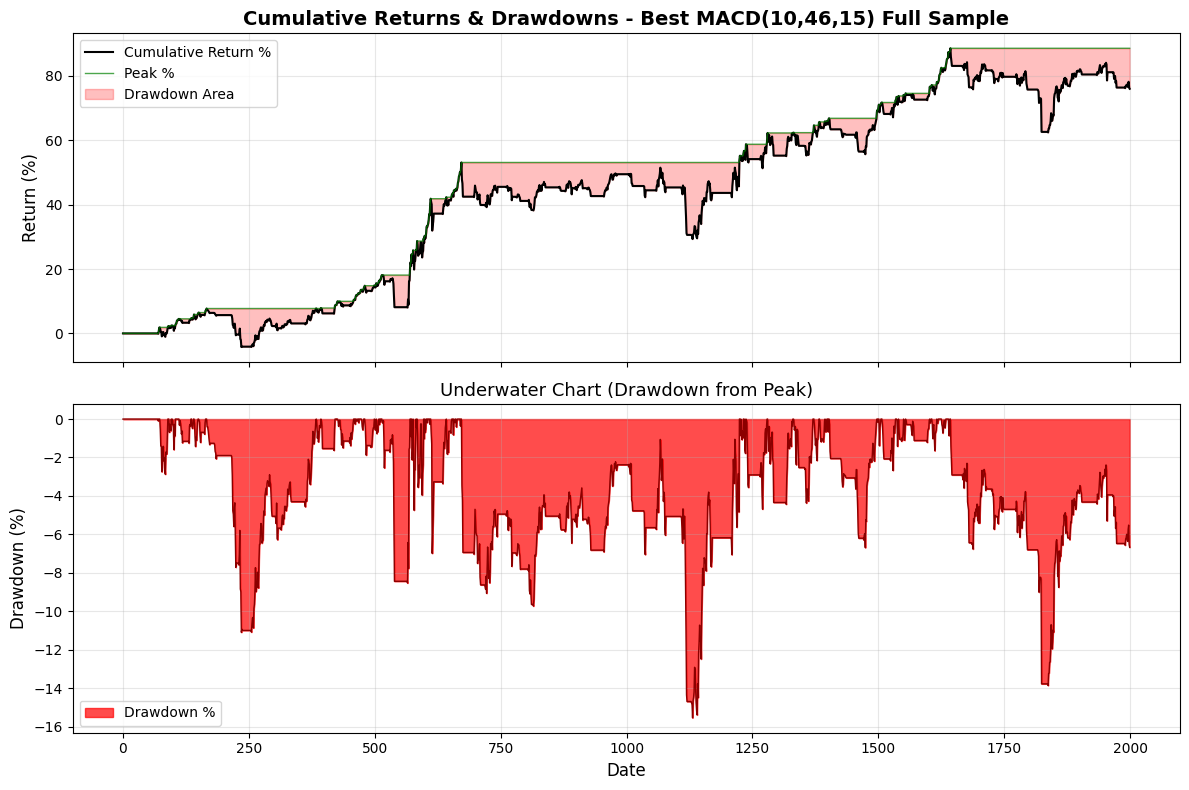

✅ Rolling Sharpe and Drawdown analysis complete for best strategy: MACD(10,46,15)


In [123]:
# FULL-SAMPLE ROLLING SHARPE + DRAWDOWNS - BEST STRATEGY

if results_df.empty:
    print("No results to visualize.")
else:
    # Get BEST strategy (highest Sharpe ratio)
    best = results_df.loc[results_df['sharpe_ratio'].idxmax()]
    fast, slow, signal = int(best['fast_period']), int(best['slow_period']), int(best['signal_period'])

    # Build full-sample MACD signals
    macd_full, signal_full, hist_full = talib.MACD(
        close.values,
        fastperiod=fast,
        slowperiod=slow,
        signalperiod=signal
    )
    
    macd_series = pd.Series(macd_full, index=close.index)
    signal_series = pd.Series(signal_full, index=close.index)
    hist_series = pd.Series(hist_full, index=close.index)
    
    # MACD crossover signals (RAW)
    entries_1 = macd_series.vbt.crossed_above(signal_series).reindex(close.index).fillna(False)
    entries_2 = hist_series.vbt.crossed_above(0).reindex(close.index).fillna(False)
    entries_raw = entries_1 | entries_2
    
    exits_1 = macd_series.vbt.crossed_below(signal_series).reindex(close.index).fillna(False)
    exits_2 = hist_series.vbt.crossed_below(0).reindex(close.index).fillna(False)
    exits_raw = exits_1 | exits_2
    
    # ⚠️ FIX LOOKAHEAD BIAS: Shift signals by 1 bar
    entries_full = entries_raw.shift(1).fillna(False).to_numpy(dtype=bool)
    exits_full = exits_raw.shift(1).fillna(False).to_numpy(dtype=bool)

    price_full = close.to_numpy(dtype=float)

    pf_full = vbt.Portfolio.from_signals(
        close=price_full,
        entries=entries_full,
        exits=exits_full,
        init_cash=100_000,
        fees=0.0005,
        slippage=0.0005,
        freq=FREQ
    )

    # Compute returns
    ret = pf_full.returns()

    # 1) Rolling Sharpe (252-day window)
    rolling_window = max(20, min(252, max(1, len(ret) // 4)))
    if len(ret) > rolling_window:
        rolling_sharpe = ret.rolling(window=rolling_window).apply(
            lambda x: (x.mean() * 252) / (x.std() * np.sqrt(252)) if x.std() and x.std() != 0 else np.nan,
            raw=False
        )

        plt.figure(figsize=(12, 5))
        plt.plot(rolling_sharpe.index, rolling_sharpe.values, linewidth=2, color='blue', alpha=0.85)
        plt.axhline(y=1.0, color='green', linestyle='--', alpha=0.6, label='Sharpe = 1.0')
        plt.axhline(y=0.5, color='orange', linestyle='--', alpha=0.6, label='Sharpe = 0.5')
        plt.axhline(y=0.0, color='red', linestyle='--', alpha=0.6, label='Sharpe = 0.0')
        plt.title(f'Rolling Sharpe (window={rolling_window}) - Best MACD({fast},{slow},{signal}) Full Sample', fontsize=14, fontweight='bold')
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Rolling Sharpe Ratio', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ Not enough data for rolling Sharpe calculation.")

    # 2) Drawdowns (underwater)
    eq = (1 + ret).cumprod()
    peak = eq.cummax()
    dd = (eq - peak) / peak

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    ax1.plot(eq.index, (eq - 1) * 100, color='black', linewidth=1.5, label='Cumulative Return %')
    ax1.plot(peak.index, (peak - 1) * 100, color='green', linewidth=1.0, alpha=0.7, label='Peak %')
    ax1.fill_between(eq.index, (eq - 1) * 100, (peak - 1) * 100, color='red', alpha=0.25, label='Drawdown Area')
    ax1.set_title(f'Cumulative Returns & Drawdowns - Best MACD({fast},{slow},{signal}) Full Sample', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Return (%)', fontsize=12)
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    ax2.fill_between(dd.index, dd * 100, 0, color='red', alpha=0.7, label='Drawdown %')
    ax2.plot(dd.index, dd * 100, color='darkred', linewidth=1)
    ax2.set_title('Underwater Chart (Drawdown from Peak)', fontsize=13)
    ax2.set_xlabel('Date', fontsize=12)
    ax2.set_ylabel('Drawdown (%)', fontsize=12)
    ax2.grid(True, alpha=0.3)
    ax2.legend()

    plt.tight_layout()
    plt.show()
    
    print(f"✅ Rolling Sharpe and Drawdown analysis complete for best strategy: MACD({fast},{slow},{signal})")

In [124]:
# STEP 5C: VISUALS ONLY (Signals + Equity Curves) - BEST STRATEGY

if results_df.empty:
    print("No results to visualize.")
else:
    # Get BEST strategy (highest Sharpe ratio)
    best = results_df.loc[results_df['sharpe_ratio'].idxmax()]
    fast, slow, signal = int(best['fast_period']), int(best['slow_period']), int(best['signal_period'])

    # Build full sample MACD and signals
    macd_full, signal_full, hist_full = talib.MACD(
        close.values,
        fastperiod=fast,
        slowperiod=slow,
        signalperiod=signal
    )
    
    macd_series = pd.Series(macd_full, index=close.index)
    signal_series = pd.Series(signal_full, index=close.index)
    hist_series = pd.Series(hist_full, index=close.index)
    
    # MACD crossover signals (RAW)
    entries_raw = (macd_series.vbt.crossed_above(signal_series) | hist_series.vbt.crossed_above(0))
    exits_raw = (macd_series.vbt.crossed_below(signal_series) | hist_series.vbt.crossed_below(0)))
    
    # ⚠️ FIX LOOKAHEAD BIAS: Shift signals by 1 bar
    entries_full = entries_raw.shift(1).fillna(False).reindex(close.index).fillna(False).to_numpy(dtype=bool)
    exits_full = exits_raw.shift(1).fillna(False).reindex(close.index).fillna(False).to_numpy(dtype=bool)

    # 1) Price + MACD + signals (full sample)
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.plot(close.index, close.values, label='Close', color='black', linewidth=1.5, alpha=0.7)
    ax.plot(close.index, macd_series.values, label=f'MACD ({fast},{slow})', color='blue', alpha=0.8, linewidth=1.2)
    ax.plot(close.index, signal_series.values, label=f'Signal ({signal})', color='orange', alpha=0.8, linewidth=1.2)
    ax.plot(close.index, hist_series.values, label='Histogram', color='purple', alpha=0.6, linewidth=1.0)

    buy_idx = close.index[entries_full]
    sell_idx = close.index[exits_full]
    ax.scatter(buy_idx, close.reindex(buy_idx).values, marker='^', color='green', s=80, label='Buy', zorder=5)
    ax.scatter(sell_idx, close.reindex(sell_idx).values, marker='v', color='red', s=80, label='Sell', zorder=5)

    ax.set_title(f'Best MACD({fast},{slow},{signal}) - Full Sample Signals', fontsize=14, fontweight='bold')
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Price', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.legend(loc='best')
    plt.tight_layout()
    plt.show()

    # 2) Equity curves: train / val / full
    price_full = close.to_numpy(dtype=float)
    entries_train = entries_full[:split_idx]
    exits_train = exits_full[:split_idx]
    entries_val = entries_full[split_idx:]
    exits_val = exits_full[split_idx:]

    pf_full = vbt.Portfolio.from_signals(
        close=price_full,
        entries=entries_full,
        exits=exits_full,
        init_cash=100_000,
        fees=0.0005,
        slippage=0.0005,
        freq=FREQ
    )

    pf_train = vbt.Portfolio.from_signals(
        close=train_close.to_numpy(dtype=float),
        entries=entries_train,
        exits=exits_train,
        init_cash=100_000,
        fees=0.0005,
        slippage=0.0005,
        freq=FREQ
    )

    pf_val2 = vbt.Portfolio.from_signals(
        close=val_close.to_numpy(dtype=float),
        entries=entries_val,
        exits=exits_val,
        init_cash=100_000,
        fees=0.0005,
        slippage=0.0005,
        freq=FREQ
    )

    eq_full = (1 + pf_full.returns()).cumprod()
    eq_train = (1 + pf_train.returns()).cumprod()
    eq_val = (1 + pf_val2.returns()).cumprod()

    fig, ax = plt.subplots(figsize=(14, 7))
    ax.plot(close.index, eq_full.values, label='Full Sample', color='black', linewidth=2)
    ax.plot(train_close.index, eq_train.values, label='Train (In-Sample)', color='blue', linewidth=1.5, alpha=0.8)
    ax.plot(val_close.index, eq_val.values, label='Validation (Out-of-Sample)', color='orange', linewidth=1.5, alpha=0.8)
    
    # Add vertical line to show train/val split
    ax.axvline(x=train_close.index[-1], color='red', linestyle='--', alpha=0.5, label='Train/Val Split')

    ax.set_title(f'Best MACD({fast},{slow},{signal}) - Equity Curves', fontsize=14, fontweight='bold')
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Cumulative Returns (normalized to 1)', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.legend(loc='best')
    plt.tight_layout()
    plt.show()

    print(f"Visualizations complete for best strategy: MACD({fast},{slow},{signal})")

SyntaxError: unmatched ')' (391988027.py, line 24)

Total trades plotted: 37
Win Rate: 35.1% (13W / 24L)
Avg Win: 9.93% | Avg Loss: -3.24%
Max Win: 53.06% | Max Loss: -13.84%


C:\Users\harka\AppData\Local\Temp\ipykernel_13092\383210688.py:53: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\harka\AppData\Local\Temp\ipykernel_13092\383210688.py:54: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



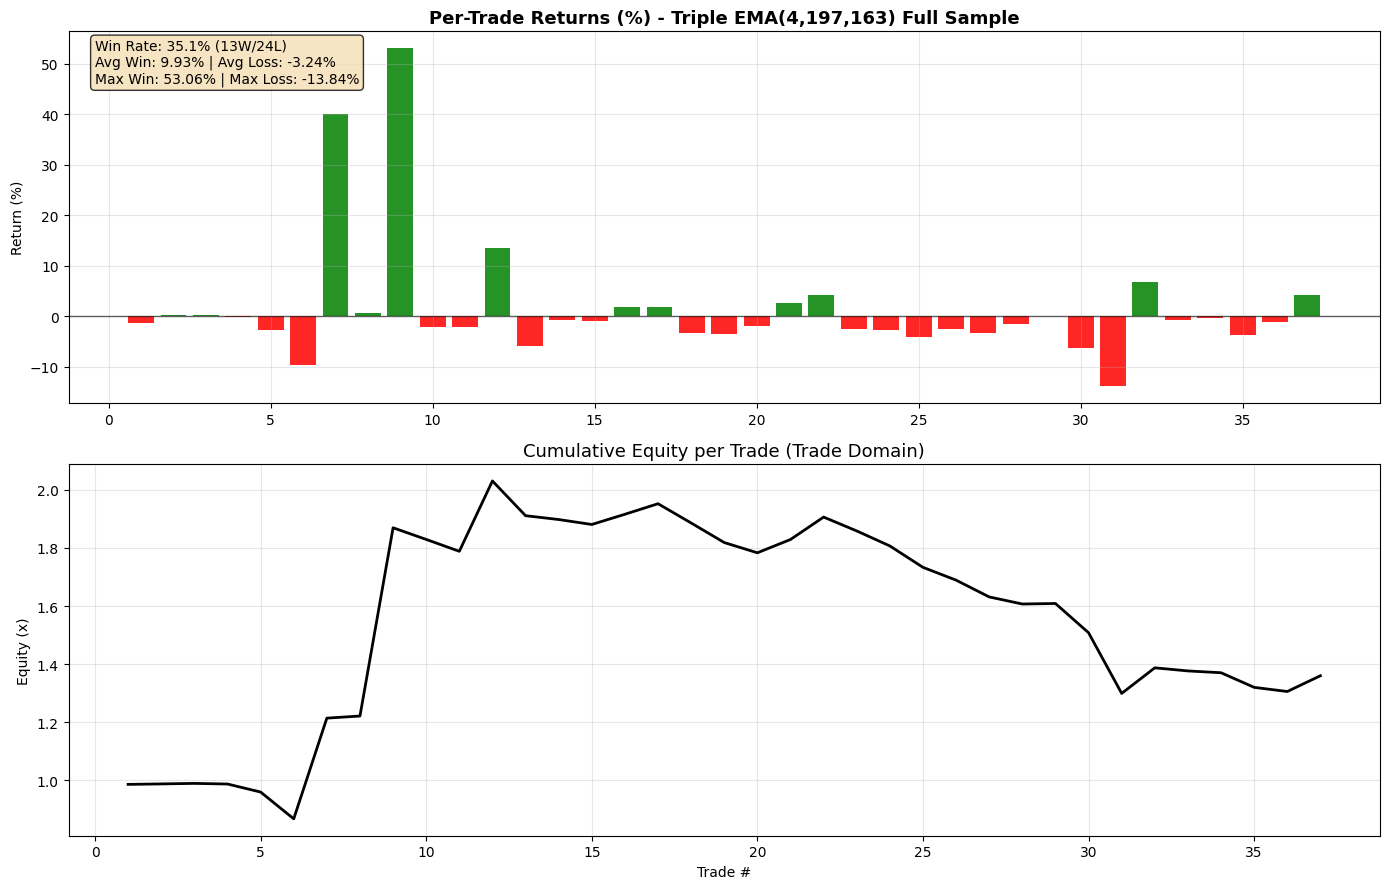

In [ ]:
# FULL-SAMPLE TRADE-BY-TRADE RETURNS (BAR) + CUMULATIVE PER-TRADE EQUITY — ALL TRADESbt

if 'FREQ' not in globals():
    FREQ = "1D"

# Resolve full close series
if 'close' in globals() and hasattr(close, 'index'):
    full_close = close.astype(float)
else:
    if isinstance(stock_data.columns, pd.MultiIndex):
        if ('Close', TICKER) in stock_data.columns:
            full_close = stock_data[('Close', TICKER)].astype(float).rename(TICKER)
        else:
            found = None
            for col in stock_data.columns:
                if isinstance(col, tuple) and ('Close' in col):
                    found = col; break
            if found is None:
                for col in stock_data.columns:
                    if 'Close' in str(col):
                        found = col; break
            if found is None:
                raise KeyError("Could not find a 'Close' column for full-sample trade plot.")
            full_close = stock_data[found].astype(float).rename(TICKER)
    else:
        full_close = stock_data['Close'].astype(float).rename(TICKER)

# Best params
if 'results_df' not in globals() or results_df.empty:
    raise ValueError("results_df is empty or missing. Run the grid search first.")
best = results_df.loc[results_df['sharpe_ratio'].idxmax()]
fast, slow, signal = int(best['fast_period']), int(best['slow_period']), int(best['signal_period'])

# Indicators
macd_full, signal_full, hist_full = talib.MACD(
    full_close.values,
    fastperiod=fast,
    slowperiod=slow,
    signalperiod=signal
)

macd_series = pd.Series(macd_full, index=full_close.index)
signal_series = pd.Series(signal_full, index=full_close.index)
hist_series = pd.Series(hist_full, index=full_close.index)

# Signals (MATCH GRID SEARCH LOGIC - simple OR, no extra conditions)
entries_raw = (
    macd_series.vbt.crossed_above(signal_series) |
    hist_series.vbt.crossed_above(0)
)
exits_raw = (
    macd_series.vbt.crossed_below(signal_series) |
    hist_series.vbt.crossed_below(0)
)

# ⚠️ FIX LOOKAHEAD BIAS: Shift signals by 1 bar
# Convert to plain arrays AND shift
entries_shifted = pd.Series(np.asarray(entries_raw).ravel(), index=full_close.index, dtype=bool).shift(1).fillna(False)
exits_shifted = pd.Series(np.asarray(exits_raw).ravel(), index=full_close.index, dtype=bool).shift(1).fillna(False)

entries_full = pd.Series(np.asarray(entries_shifted).ravel(), index=full_close.index, dtype=bool)
exits_full = pd.Series(np.asarray(exits_shifted).ravel(), index=full_close.index, dtype=bool)

# Backtest
pf_full = vbt.Portfolio.from_signals(
    close=full_close.to_numpy(dtype=float),
    entries=entries_full,
    exits=exits_full,
    init_cash=100_000,
    fees=0.0005,
    slippage=0.0005,
    freq=FREQ
)

# Trade-by-trade returns (ALL trades)
trades = pf_full.trades
trade_returns = trades.returns.values if hasattr(trades.returns, 'values') else np.asarray(trades.returns)
trade_returns = np.asarray(trade_returns).ravel()  # ensure 1D

if trade_returns.size == 0:
    print("No trades to plot.")
else:
    # Calculate statistics
    winning_trades = trade_returns[trade_returns > 0]
    losing_trades = trade_returns[trade_returns < 0]
    
    total_trades = len(trade_returns)
    win_count = len(winning_trades)
    loss_count = len(losing_trades)
    win_rate = (win_count / total_trades * 100) if total_trades > 0 else 0
    
    avg_win_pct = (winning_trades.mean() * 100) if len(winning_trades) > 0 else 0
    avg_loss_pct = (losing_trades.mean() * 100) if len(losing_trades) > 0 else 0
    max_win_pct = (winning_trades.max() * 100) if len(winning_trades) > 0 else 0
    max_loss_pct = (losing_trades.min() * 100) if len(losing_trades) > 0 else 0
    
    print(f"Total trades plotted: {total_trades}")
    print(f"Win Rate: {win_rate:.1f}% ({win_count}W / {loss_count}L)")
    print(f"Avg Win: {avg_win_pct:.2f}% | Avg Loss: {avg_loss_pct:.2f}%")
    print(f"Max Win: {max_win_pct:.2f}% | Max Loss: {max_loss_pct:.2f}%")
    
    equity_per_trade = np.cumprod(1.0 + trade_returns)

    fig, axes = plt.subplots(2, 1, figsize=(14, 9), sharex=False)

    # Per-trade returns (%), all trades
    x = np.arange(1, trade_returns.size + 1)
    colors = np.where(trade_returns >= 0, 'green', 'red')
    axes[0].bar(x, trade_returns * 100.0, color=colors, alpha=0.85, width=0.8)
    axes[0].axhline(0, color='black', linewidth=1, alpha=0.6)
    
    # Add statistics text box on the chart
    stats_text = (
        f'Win Rate: {win_rate:.1f}% ({win_count}W/{loss_count}L)\n'
        f'Avg Win: {avg_win_pct:.2f}% | Avg Loss: {avg_loss_pct:.2f}%\n'
        f'Max Win: {max_win_pct:.2f}% | Max Loss: {max_loss_pct:.2f}%'
    )
    axes[0].text(0.02, 0.98, stats_text, transform=axes[0].transAxes,
                fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    axes[0].set_title(f'Per-Trade Returns (%) - MACD({fast},{slow},{signal}) Full Sample', 
                     fontsize=13, fontweight='bold')
    axes[0].set_ylabel('Return (%)')
    axes[0].grid(True, alpha=0.3)

    # Cumulative equity per trade
    axes[1].plot(x, equity_per_trade, color='black', linewidth=2)
    axes[1].set_title('Cumulative Equity per Trade (Trade Domain)', fontsize=13)
    axes[1].set_xlabel('Trade #')
    axes[1].set_ylabel('Equity (x)')
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


🔬 PARAMETER SENSITIVITY ANALYSIS - Base: EMA(7,197,157)
IS Sharpe: 0.952 | OOS Sharpe: -0.764

🔄 Testing 83 parameter variations...


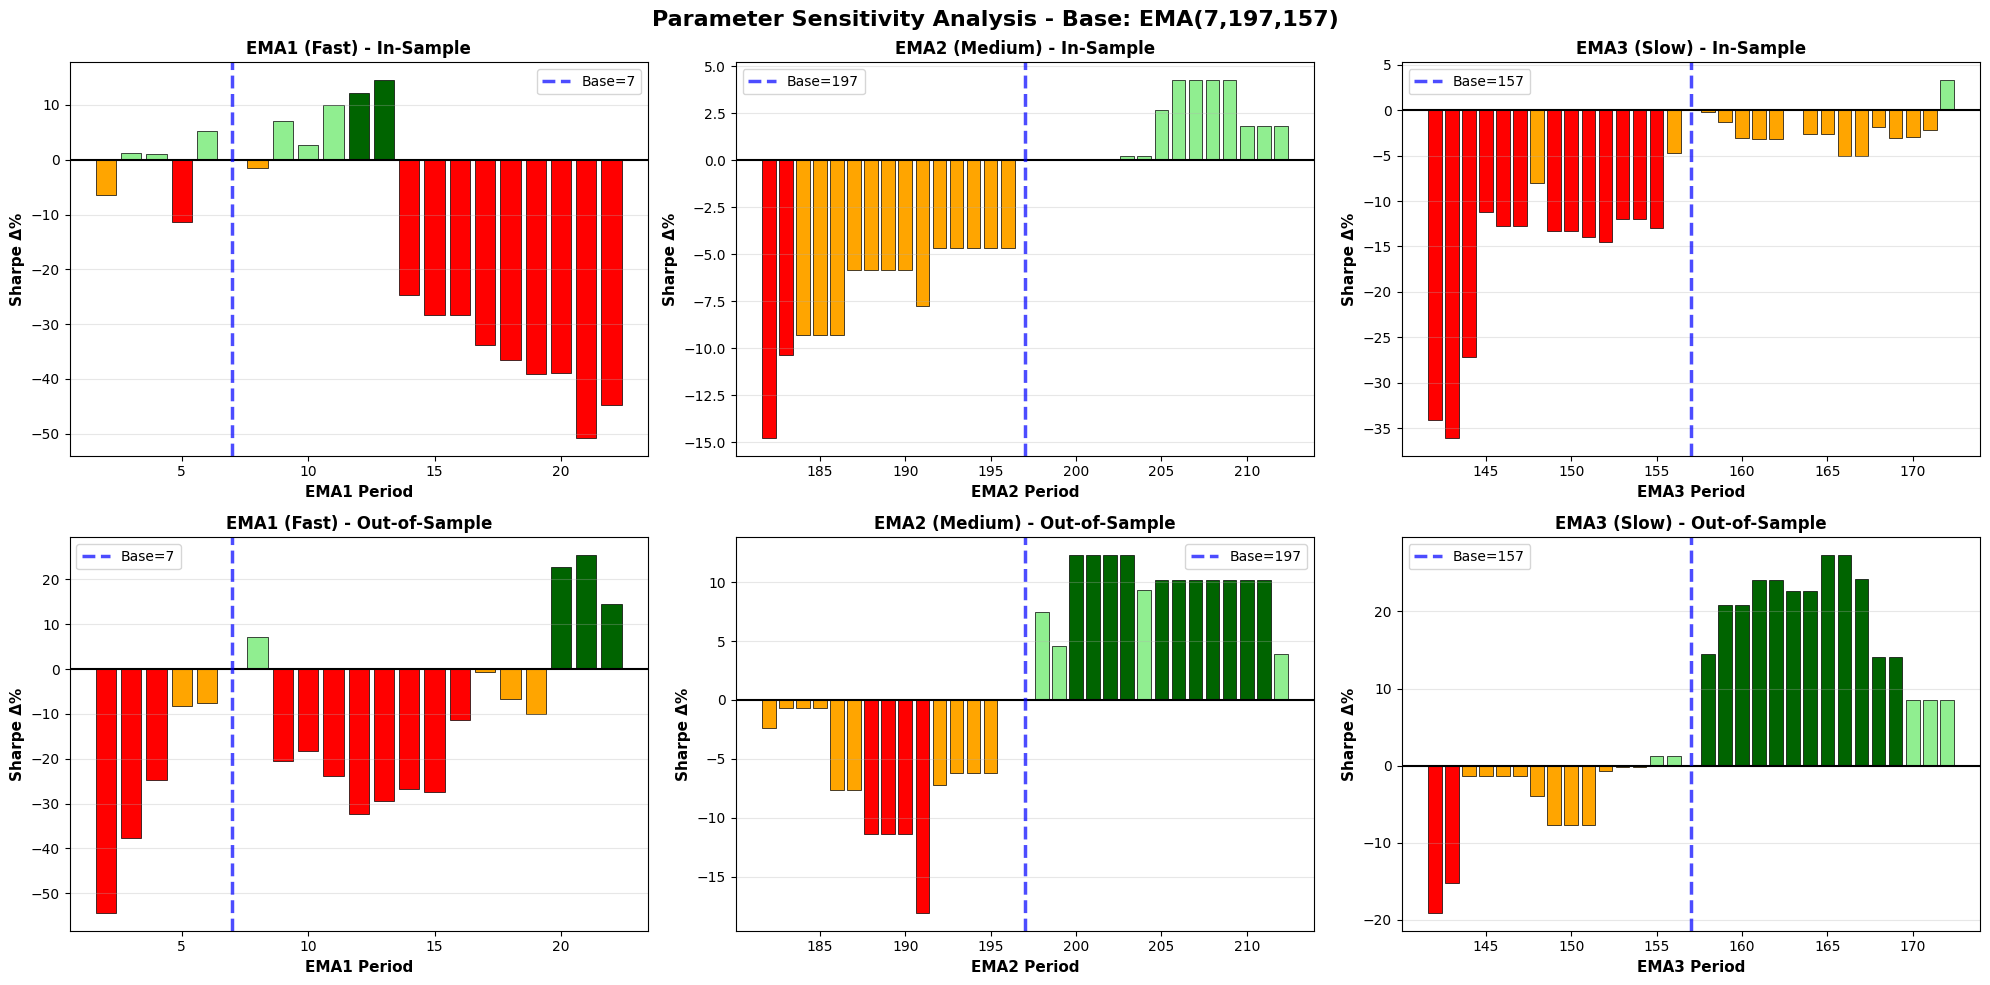


📋 SENSITIVITY SUMMARY
Parameter      IS Range IS Max Δ%       OOS Range OOS Max Δ% Sensitivity
     EMA1 0.469 - 1.091    -50.7% -1.179 - -0.570     -54.4%     ⚠️ HIGH
     EMA2 0.812 - 0.993    -14.8% -0.902 - -0.670     -18.1%       ✅ LOW
     EMA3 0.609 - 0.984    -36.1% -0.910 - -0.555     -19.1%       ✅ LOW

✅ Analysis Complete! Green = Robust, Red = Fragile


In [ ]:
# COMPACT PARAMETER SENSITIVITY ANALYSIS - HEATMAPS ONLY

if results_df.empty:
    print("No results available for sensitivity analysis.")
else:
    # Use BEST OOS strategy (from previous cells)
    if 'BEST_FAST' in globals():
        fast_base, slow_base, signal_base = BEST_FAST, BEST_SLOW, BEST_SIGNAL
        base_is_sharpe = BEST_IS_SHARPE
        base_oos_sharpe = BEST_OOS_SHARPE
        print(f"🔬 PARAMETER SENSITIVITY ANALYSIS - Base: MACD({fast_base},{slow_base},{signal_base})")
        print(f"IS Sharpe: {base_is_sharpe:.3f} | OOS Sharpe: {base_oos_sharpe:.3f}")
    else:
        best = results_df.loc[results_df['sharpe_ratio'].idxmax()]
        fast_base, slow_base, signal_base = int(best['fast_period']), int(best['slow_period']), int(best['signal_period'])
        base_is_sharpe = float(best['sharpe_ratio'])
        base_oos_sharpe = np.nan
        print(f"🔬 PARAMETER SENSITIVITY ANALYSIS - Base: MACD({fast_base},{slow_base},{signal_base})")
        print(f"IS Sharpe: {base_is_sharpe:.3f}")

    # Create sensitivity ranges (±15 around each parameter)
    fast_range = sorted(list(set(range(max(2, fast_base - 15), fast_base + 16))))
    slow_range = sorted(list(set(range(max(3, slow_base - 15), slow_base + 16))))
    signal_range = sorted(list(set(range(max(2, signal_base - 15), signal_base + 16))))
    
    combos_fast = [(f, slow_base, signal_base) for f in fast_range]
    combos_slow = [(fast_base, s, signal_base) for s in slow_range]
    combos_signal = [(fast_base, slow_base, sig) for sig in signal_range]
    all_combos = combos_fast + combos_slow + combos_signal

    def eval_combo_both(f: int, s: int, sig: int) -> dict:
        """Evaluate on both in-sample and out-of-sample"""
        # IN-SAMPLE
        macd_is, signal_is, hist_is = talib.MACD(
            train_close.values,
            fastperiod=f,
            slowperiod=s,
            signalperiod=sig
        )
        
        macd_series_is = pd.Series(macd_is, index=train_close.index)
        signal_series_is = pd.Series(signal_is, index=train_close.index)
        hist_series_is = pd.Series(hist_is, index=train_close.index)
        
        e_raw_is = (macd_series_is.vbt.crossed_above(signal_series_is) | hist_series_is.vbt.crossed_above(0))
        x_raw_is = (macd_series_is.vbt.crossed_below(signal_series_is) | hist_series_is.vbt.crossed_below(0))
        
        e_shifted_is = e_raw_is.shift(1)
        e_is = pd.Series(np.where(e_shifted_is.isna(), False, e_shifted_is), index=train_close.index, dtype=bool)
        x_shifted_is = x_raw_is.shift(1)
        x_is = pd.Series(np.where(x_shifted_is.isna(), False, x_shifted_is), index=train_close.index, dtype=bool)
        
        pf_is = vbt.Portfolio.from_signals(close=train_close, entries=e_is, exits=x_is, 
                                          init_cash=100_000, fees=0.0005, slippage=0.0005, freq='D')
        
        # OUT-OF-SAMPLE
        macd_oos, signal_oos, hist_oos = talib.MACD(
            val_close.values,
            fastperiod=f,
            slowperiod=s,
            signalperiod=sig
        )
        
        macd_series_oos = pd.Series(macd_oos, index=val_close.index)
        signal_series_oos = pd.Series(signal_oos, index=val_close.index)
        hist_series_oos = pd.Series(hist_oos, index=val_close.index)
        
        e_raw_oos = (macd_series_oos.vbt.crossed_above(signal_series_oos) | hist_series_oos.vbt.crossed_above(0))
        x_raw_oos = (macd_series_oos.vbt.crossed_below(signal_series_oos) | hist_series_oos.vbt.crossed_below(0))
        
        e_shifted_oos = e_raw_oos.shift(1)
        e_oos = pd.Series(np.where(e_shifted_oos.isna(), False, e_shifted_oos), index=val_close.index, dtype=bool)
        x_shifted_oos = x_raw_oos.shift(1)
        x_oos = pd.Series(np.where(x_shifted_oos.isna(), False, x_shifted_oos), index=val_close.index, dtype=bool)
        
        pf_oos = vbt.Portfolio.from_signals(close=val_close, entries=e_oos, exits=x_oos,
                                           init_cash=100_000, fees=0.0005, slippage=0.0005, freq='D')
        
        return {
            'fast': f, 'slow': s, 'signal': sig,
            'is_sharpe': float(pf_is.sharpe_ratio(freq='D')),
            'is_return': float(pf_is.total_return()),
            'is_maxdd': float(pf_is.max_drawdown()),
            'oos_sharpe': float(pf_oos.sharpe_ratio(freq='D')),
            'oos_return': float(pf_oos.total_return()),
            'oos_maxdd': float(pf_oos.max_drawdown()),
            'oos_trades': len(pf_oos.trades)
        }

    print(f"\n🔄 Testing {len(all_combos)} parameter variations...")
    
    rows = []
    for combo in all_combos:
        try:
            rows.append(eval_combo_both(*combo))
        except Exception:
            pass

    if not rows:
        print("❌ No sensitivity results computed.")
    else:
        sens_df = pd.DataFrame(rows)
        
        # Split by parameter variation type (fix boolean indexing)
        fast_variations = sens_df[(sens_df['slow'] == slow_base) & (sens_df['signal'] == signal_base)].copy().sort_values('fast')
        slow_variations = sens_df[(sens_df['fast'] == fast_base) & (sens_df['signal'] == signal_base)].copy().sort_values('slow')
        signal_variations = sens_df[(sens_df['fast'] == fast_base) & (sens_df['slow'] == slow_base)].copy().sort_values('signal')
        
        # Calculate degradations
        fast_variations['is_sharpe_delta'] = ((fast_variations['is_sharpe'] - base_is_sharpe) / abs(base_is_sharpe) * 100)
        slow_variations['is_sharpe_delta'] = ((slow_variations['is_sharpe'] - base_is_sharpe) / abs(base_is_sharpe) * 100)
        signal_variations['is_sharpe_delta'] = ((signal_variations['is_sharpe'] - base_is_sharpe) / abs(base_is_sharpe) * 100)
        
        if not np.isnan(base_oos_sharpe):
            fast_variations['oos_sharpe_delta'] = ((fast_variations['oos_sharpe'] - base_oos_sharpe) / abs(base_oos_sharpe) * 100)
            slow_variations['oos_sharpe_delta'] = ((slow_variations['oos_sharpe'] - base_oos_sharpe) / abs(base_oos_sharpe) * 100)
            signal_variations['oos_sharpe_delta'] = ((signal_variations['oos_sharpe'] - base_oos_sharpe) / abs(base_oos_sharpe) * 100)
        
        # CREATE BAR CHARTS - MUCH CLEANER FOR 1D SENSITIVITY
        fig, axes = plt.subplots(2, 3, figsize=(20, 10))
        fig.suptitle(f'Parameter Sensitivity Analysis - Base: MACD({fast_base},{slow_base},{signal_base})', 
                     fontsize=16, fontweight='bold')
        
        # IN-SAMPLE BAR CHARTS
        # Fast IS
        colors1_is = ['red' if x < -10 else 'orange' if x < 0 else 'lightgreen' if x < 10 else 'darkgreen' 
                      for x in fast_variations['is_sharpe_delta']]
        bars1 = axes[0, 0].bar(fast_variations['fast'], fast_variations['is_sharpe_delta'], color=colors1_is, edgecolor='black', linewidth=0.5)
        axes[0, 0].axhline(0, color='black', linewidth=1.5)
        axes[0, 0].axvline(fast_base, color='blue', linestyle='--', linewidth=2.5, alpha=0.7, label=f'Base={fast_base}')
        axes[0, 0].set_xlabel('Fast Period', fontsize=11, fontweight='bold')
        axes[0, 0].set_ylabel('Sharpe Δ%', fontsize=11, fontweight='bold')
        axes[0, 0].set_title('Fast Period - In-Sample', fontsize=12, fontweight='bold')
        axes[0, 0].grid(axis='y', alpha=0.3)
        axes[0, 0].legend(fontsize=10)
        
        # Slow IS
        colors2_is = ['red' if x < -10 else 'orange' if x < 0 else 'lightgreen' if x < 10 else 'darkgreen' 
                      for x in slow_variations['is_sharpe_delta']]
        bars2 = axes[0, 1].bar(slow_variations['slow'], slow_variations['is_sharpe_delta'], color=colors2_is, edgecolor='black', linewidth=0.5)
        axes[0, 1].axhline(0, color='black', linewidth=1.5)
        axes[0, 1].axvline(slow_base, color='blue', linestyle='--', linewidth=2.5, alpha=0.7, label=f'Base={slow_base}')
        axes[0, 1].set_xlabel('Slow Period', fontsize=11, fontweight='bold')
        axes[0, 1].set_ylabel('Sharpe Δ%', fontsize=11, fontweight='bold')
        axes[0, 1].set_title('Slow Period - In-Sample', fontsize=12, fontweight='bold')
        axes[0, 1].grid(axis='y', alpha=0.3)
        axes[0, 1].legend(fontsize=10)
        
        # Signal IS
        colors3_is = ['red' if x < -10 else 'orange' if x < 0 else 'lightgreen' if x < 10 else 'darkgreen' 
                      for x in signal_variations['is_sharpe_delta']]
        bars3 = axes[0, 2].bar(signal_variations['signal'], signal_variations['is_sharpe_delta'], color=colors3_is, edgecolor='black', linewidth=0.5)
        axes[0, 2].axhline(0, color='black', linewidth=1.5)
        axes[0, 2].axvline(signal_base, color='blue', linestyle='--', linewidth=2.5, alpha=0.7, label=f'Base={signal_base}')
        axes[0, 2].set_xlabel('Signal Period', fontsize=11, fontweight='bold')
        axes[0, 2].set_ylabel('Sharpe Δ%', fontsize=11, fontweight='bold')
        axes[0, 2].set_title('Signal Period - In-Sample', fontsize=12, fontweight='bold')
        axes[0, 2].grid(axis='y', alpha=0.3)
        axes[0, 2].legend(fontsize=10)
        
        # OUT-OF-SAMPLE BAR CHARTS
        if not np.isnan(base_oos_sharpe):
            # Fast OOS
            colors1_oos = ['red' if x < -10 else 'orange' if x < 0 else 'lightgreen' if x < 10 else 'darkgreen' 
                          for x in fast_variations['oos_sharpe_delta']]
            bars4 = axes[1, 0].bar(fast_variations['fast'], fast_variations['oos_sharpe_delta'], color=colors1_oos, edgecolor='black', linewidth=0.5)
            axes[1, 0].axhline(0, color='black', linewidth=1.5)
            axes[1, 0].axvline(fast_base, color='blue', linestyle='--', linewidth=2.5, alpha=0.7, label=f'Base={fast_base}')
            axes[1, 0].set_xlabel('Fast Period', fontsize=11, fontweight='bold')
            axes[1, 0].set_ylabel('Sharpe Δ%', fontsize=11, fontweight='bold')
            axes[1, 0].set_title('Fast Period - Out-of-Sample', fontsize=12, fontweight='bold')
            axes[1, 0].grid(axis='y', alpha=0.3)
            axes[1, 0].legend(fontsize=10)
            
            # Slow OOS
            colors2_oos = ['red' if x < -10 else 'orange' if x < 0 else 'lightgreen' if x < 10 else 'darkgreen' 
                          for x in slow_variations['oos_sharpe_delta']]
            bars5 = axes[1, 1].bar(slow_variations['slow'], slow_variations['oos_sharpe_delta'], color=colors2_oos, edgecolor='black', linewidth=0.5)
            axes[1, 1].axhline(0, color='black', linewidth=1.5)
            axes[1, 1].axvline(slow_base, color='blue', linestyle='--', linewidth=2.5, alpha=0.7, label=f'Base={slow_base}')
            axes[1, 1].set_xlabel('Slow Period', fontsize=11, fontweight='bold')
            axes[1, 1].set_ylabel('Sharpe Δ%', fontsize=11, fontweight='bold')
            axes[1, 1].set_title('Slow Period - Out-of-Sample', fontsize=12, fontweight='bold')
            axes[1, 1].grid(axis='y', alpha=0.3)
            axes[1, 1].legend(fontsize=10)
            
            # Signal OOS
            colors3_oos = ['red' if x < -10 else 'orange' if x < 0 else 'lightgreen' if x < 10 else 'darkgreen' 
                          for x in signal_variations['oos_sharpe_delta']]
            bars6 = axes[1, 2].bar(signal_variations['signal'], signal_variations['oos_sharpe_delta'], color=colors3_oos, edgecolor='black', linewidth=0.5)
            axes[1, 2].axhline(0, color='black', linewidth=1.5)
            axes[1, 2].axvline(signal_base, color='blue', linestyle='--', linewidth=2.5, alpha=0.7, label=f'Base={signal_base}')
            axes[1, 2].set_xlabel('Signal Period', fontsize=11, fontweight='bold')
            axes[1, 2].set_ylabel('Sharpe Δ%', fontsize=11, fontweight='bold')
            axes[1, 2].set_title('Signal Period - Out-of-Sample', fontsize=12, fontweight='bold')
            axes[1, 2].grid(axis='y', alpha=0.3)
            axes[1, 2].legend(fontsize=10)
        
        plt.tight_layout()
        plt.show()
        
        # COMPACT SUMMARY TABLE
        print("\n📋 SENSITIVITY SUMMARY")
        print("=" * 80)
        
        summary_data = []
        for param_name, variations, param_col in [('EMA1', ema1_variations, 'ema1'), 
                                                   ('EMA2', ema2_variations, 'ema2'), 
                                                   ('EMA3', ema3_variations, 'ema3')]:
            summary_data.append({
                'Parameter': param_name,
                'IS Range': f"{variations['is_sharpe'].min():.3f} - {variations['is_sharpe'].max():.3f}",
                'IS Max Δ%': f"{variations['is_sharpe_delta'].min():.1f}%",
                'OOS Range': f"{variations['oos_sharpe'].min():.3f} - {variations['oos_sharpe'].max():.3f}" if not np.isnan(base_oos_sharpe) else 'N/A',
                'OOS Max Δ%': f"{variations['oos_sharpe_delta'].min():.1f}%" if not np.isnan(base_oos_sharpe) and 'oos_sharpe_delta' in variations else 'N/A',
                'Sensitivity': '⚠️ HIGH' if abs(variations['is_sharpe_delta'].min()) > 40 else '✅ LOW'
            })
        
        summary_df = pd.DataFrame(summary_data)
        print(summary_df.to_string(index=False))
        
        print("\n✅ Analysis Complete! Green = Robust, Red = Fragile")